https://doisinkidney.com/posts/2024-11-08-formalising-graphs-coinduction.html


Graph homomorphisms are also acted on by the permutations of labels. left and right action. so... the slotted tensor thing maybe is like that? It's a graph homorphism from the symmetry graph of the slots to the labels...

Substitutions vs term homomorphisms

Catlab Csets. ALgerbaic rewriting DPO SPO.

https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_decompositions/rankwidth.html rank width decomposition rw
what's this all about?

https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_decompositions/modular_decomposition.html modular decomposition
https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph_decompositions/tree_decomposition.html


What is a graph?

What do you want to do on it?


Search a graph
spanning tree
routing on a graph
shortest path
maximum flow
minimum cut
maximum matching
minimum spanning tree
strongly connected components
biconnected components
articulation points
bridges
2-edge connected components


colorings
covers

# Tree Decomposition

https://dl.acm.org/doi/10.1145/3689801  Fast and Optimal Extraction for Sparse Equality Graphs
https://github.com/mabseher/htd hypertree decomposition
https://github.com/PACE-challenge/Treewidth
https://pypi.org/project/treedecomp/
https://networkx.org/documentation/latest/reference/algorithms/approximation.html#module-networkx.algorithms.approximation.treewidth


In [ ]:
# brute force
graph = [(1,2),(3,4), (4,5)]

# https://docs.python.org/3/library/itertools.html#itertools-recipes
def powerset(iterable):
    "powerset([1,2,3]) → () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

def all_tree_decomp(V,G):
    #vertices = list(set(i for i,j in G) + set(j for i,j in G))
    # pick some for this bag
    # pick some edges
    if len(V) == 0:
        return () 
    for deledges in powerset(G):
        bag = set([i for i,j in deledges] + [j for i,j in deledges])
        # one or more children
        # all ways of breaking up? multinomial?
        # two overlapping subsets?
        # Well ok, binary tree decompositions is possibly a different thing, but why not



    for bag in powerset(V):
        # how do I make progress?
        # check if this bag is a separator
        is_separator = True
        for i,j in G:
            if i in bag and j in bag:
                is_separator = False
                break
        if is_separator:
            # if it is a separator, then split the graph
            #G1 = [(i,j) for i,j in G if i in bag or j in bag]
            needed = [(i,j) for i,j in G if i not in bag and j not in bag]
            # recursively call the function
            for T1 in all_tree_decomp(G1):
                for T2 in all_tree_decomp(G2):
                    yield (bag, T1, T2)
            break

def all_tree(active_edge, bag, G):
    

# each bag will only appear once right?

# eaiser to do bottom up maybe?

for bag in powerset(V):
    active = set( i,j for i,j in G if i in bag j not in bag)
    dealt_with = set( i,j for i,j in G if i in bag and j in bag)
    todo = [(active, dealt_with, bag)]
passive = []
while todo:
    active, dealt_with, bag = todo.pop()
    for d in passive: # search for other passive sibling bags
        


    passive.append((active, dealt_with, bag))


todo = [(set(range(1,6)), graph)]
while todo:
    active, bag = todo.pop()
    for newverts in powerset(V - bag) # but has to contain active + 1
        for usedactive in powerset(active):
            if len(usedactive) == 0:
                continue
            else:
                newbag = usedactive | newverts
                
                todo.append((newverts, newbag, newgraph))

for bag in powerset(V):


def is_tree_decmp(d, G):



In [ ]:
# tree decomp
class Node():
    bag: set[V]
    bagedges : set[E]
    children: set[Node]

    def treewidth(self):
        return max(len(self.bag) - 1, max([c.treewidth() for c in self.children]))
    

class GraphTree():
    here: set[V] # nodes only here
    edges: set[E] #egdes between only here and children
    children: set[tuple[set[V], GraphTree]]

    def color(self, colors):
       # take in a list of colors 


In [ ]:
V = int
Edge = tuple[V,V]

# flat reps
Graph1 = set[Edge]
Graph2 = list[Edge]
Graph3 = dict[V, set[V]]


# structured representations

In [ ]:
# kerngihan Lin

def kl(edges):
    A = set()
    B = set()
    



# Graph canonicalization

## group theory
This is neither here nor there kind of. It's "just" for symmettry breaking during search, which is especially painful in canonization search


caonicalizing graphs  via brute force. Come up with a system of serialzing, sort those strings. Not necessarily stable in any sense though
graph isomorphism
Sims-schreiers

schreir vectors = spanning tree. (?) store group element that would connect to previous node of spanning tree. 
This is the group union find? Huh.

schreir sims - a canonical form of group element. https://en.wikipedia.org/wiki/Schreier%E2%80%93Sims_algorithm

Stabilizer = subgroup defined as the the group elements that leave a particular elemement unchanged

Schreir generators. If we pick representatives of the cosets of a subgroup, we can generate the subgroup using combined generators and repsdentatives as generators.

Return stabilizer of initial point as collection of schreier generatoras. Orbit stabilizer algorithm

https://en.wikipedia.org/wiki/Group_action

undirected Graph where every neighborhood has the same moves = group action on vertex set. edge pattern is generators. 
https://en.wikipedia.org/wiki/Cayley_graph
Origin is special or no?
Stabilizer group of origin are loops.
rubiks cube

https://terrytao.wordpress.com/2010/07/10/cayley-graphs-and-the-geometry-of-groups/
subgroups and bundles

a base, special points.
What if graph is disconnected?

Consider general graphs as mangled cayley graphs.
Even if I was given two cayley graphs is it obvious how to canonicaslize it?
The point of gropup theory is to cut down on boring symmettry explosion. Where is this?

cosets partition... partition refinement using group tags?

g = (h, g')  where h is element of subgroup and g' is caonoical represdentiatvie of coset


In [14]:
from dataclasses import dataclass
@dataclass(frozen=True)
class Perm():
    perm : list[int]
    @classmethod  
    def e(self, n):
        return Perm(list(range(n)))
    def __mul__(self, other):
        return Perm([self.perm[p] for p in other.perm])
    
e3 = Perm.e(3)
assert e3 * e3 == e3
p = Perm([1,0])
assert p * p == Perm.e(2)
assert Perm([1,2,0]) * Perm([2,0,1]) == Perm([0,1,2])


def naive()


Suppose I wanted the automorphism group.
Can I generate it?

 swaps
Generate permutation group. swaps

Also, swaps are kind of an incrementalo strcturue which is good for functional programming maybe.

note that this is a method to generate permutations too. swap to decide which element of remaining in in nth position.

https://en.wikipedia.org/wiki/Steinhaus%E2%80%93Johnson%E2%80%93Trotter_algorithm  Steinhaus–Johnson–Trotter algorithm
https://en.wikipedia.org/wiki/Heap%27s_algorithm
https://en.wikipedia.org/wiki/Fisher%E2%80%93Yates_shuffle randomly genrate a permutation

In [ ]:


def canon(G, N):
    swaps = [(i,j) for i in range(N) for j in range(i)]
    for 
    for p in permutations(range(3)):
        yield perm_graph(p, G)

If we do a more careful backtracking search, we can prune a lot.
We learn partial order constraints as we go. Maybe a difference logic thing would be helpful.
We get good strings by ordering the vertices by degree first.
We can do a lot of propagation.
We can do prefix comparison because we're being lexicographic.





We could have other representations of graphs. A tree representation follows naturally from Tree Decomposition (kind of. We also need to create a unique tree decomp... or use an ordering that doesn't care which tree decomp we picked. Hmmmm. best Spanning tree? Again tie breaking here brings in graph canonization. These things need to be considered bolted together).
We could then use total tree orderings instead of string orderings.

"Natrual graph orderings" like that minor homomorphism thing. https://en.wikipedia.org/wiki/Robertson%E2%80%93Seymour_theorem

Maybe this is more sensical for tree with backref ids. Which numbers do we put in the backref ids to make canonical. Then the tree structure exists a priori.


In [22]:
# to get cycles. Orbits under subgroup consisting of p^n. Generated by <p>
def cycles(p):
    found = set()
    for i in range(len(p)):
        if i not in found:
            cycle = []
            j = i
            while j not in cycle:
                cycle.append(j)
                j = p[j]
            yield cycle
            found.update(cycle)

list(cycles([1,0,2]))

def inv(p):
    inv = [0]*len(p)
    for i in range(len(p)):
        inv[p[i]] = i
    return inv

def orbit(ps, n):
    found = set()
    done = False
    while not done:
        done = False
        for f in found:
            for p in ps:
                e = p[f]
                if e not in found:
                    done = False
                    found.add(e)

Perm = list[int]
# orbit of is fixed point of this operation starting from {x}.
def step(G : list[Perm], s : set[int]) -> set[int]: # G is list/set of permutations
    return s | {p[i] for p in G for i in s}

def is_inv(G,s):
    return s == step(G,s)

# can apply standard seminaive trick
# can retain "proof" / path as group union find.

# schreier vectors


# base
# strong generating set



[[0, 1], [2]]

In [ ]:
def termact(p, t):
    head,*args = t
    return (head,*[termact(p,a) for a in args])
def canon(t, N):
    # a silly implementation.
    min([ termact(p,t) for p in itertools.permutations(range(N))])



In [ ]:

import metis

import networkx as nx
G = nx.path_graph(7)
edgecuts, parts = metis.part_graph(G,3)
print(edgecuts, parts)

print(nx.community.kernighan_lin_bisection(G)) # anneal a cut by node swapping
print(list(nx.community.girvan_newman(G))) # remove edges from graph

In [22]:

import sqlite3
import networkx as nx
def db_of_graph(conn, G):
    con.executemany("INSERT INTO nodes VALUES (?)", map(lambda v : (v,),  G.nodes))
    con.executemany("INSERT INTO edges VALUES (?, ?)", G.edges)
    if not G.is_directed():
        con.executemany("INSERT INTO edges VALUES (?, ?)", [(j,i) for i,j in G.edges])
def graph_of_db(con):
    G = nx.DiGraph()
    res = con.execute("SELECT * FROM nodes")
    G.add_nodes_from(map(lambda x: x[0], res.fetchall()))
    res = con.execute("SELECT * FROM edges")
    G.add_edges_from(res.fetchall())
    return G
def query_of_graph(G,unique=False):
    """Unique will give subgraph isomorphism"""
    selects = []
    froms = []
    wheres = []
    for node in G:
        froms += [f"nodes AS v{node}"]
        selects += [f"v{node}.v AS v{node}"]
    for i, (a,b) in enumerate(G.edges):
        froms += [f"edges as e{i}"]
        wheres += [f"e{i}.src = v{a}.v"  , f"e{i}.dst = v{b}.v"]
    if unique:
        for node in G:
            for node2 in G:
                if node != node2:
                    wheres += [f"v{node} != v{node2}"]
    sql = "SELECT " + ", ".join(selects) + \
          "\nFROM " +  ", ".join(froms) + \
          "\nWHERE " + " AND ".join(wheres)
    return sql
def clear_db(con):
    con.execute("DELETE FROM nodes")
    con.execute("DELETE FROM edges")
G = nx.path_graph(7, create_using=nx.DiGraph)
lhs = nx.path_graph(3, create_using=nx.DiGraph)
con = sqlite3.connect(":memory:")

con.execute("CREATE TABLE nodes(v)")
con.execute("CREATE TABLE edges(src,dst)")
db_of_graph(con, G)
res = con.execute(query_of_graph(lhs))
print(res.fetchall())
# Result: [(0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6)]



[(0, 1, 2), (1, 2, 3), (2, 3, 4), (3, 4, 5), (4, 5, 6)]


In [13]:
res = con.execute(query_of_graph(G))
print(query_of_graph(G))
res.fetchall()

SELECT v0.v AS v0, v1.v AS v1, v2.v AS v2, v3.v AS v3, v4.v AS v4, v5.v AS v5, v6.v AS v6
FROM nodes AS v0, nodes AS v1, nodes AS v2, nodes AS v3, nodes AS v4, nodes AS v5, nodes AS v6, edges as e0, edges as e1, edges as e2, edges as e3, edges as e4, edges as e5
WHERE e0.src = v0.v AND e0.dst = v1.v AND e1.src = v1.v AND e1.dst = v2.v AND e2.src = v2.v AND e2.dst = v3.v AND e3.src = v3.v AND e3.dst = v4.v AND e4.src = v4.v AND e4.dst = v5.v AND e5.src = v5.v AND e5.dst = v6.v


[(0, 1, 2, 3, 4, 5, 6)]

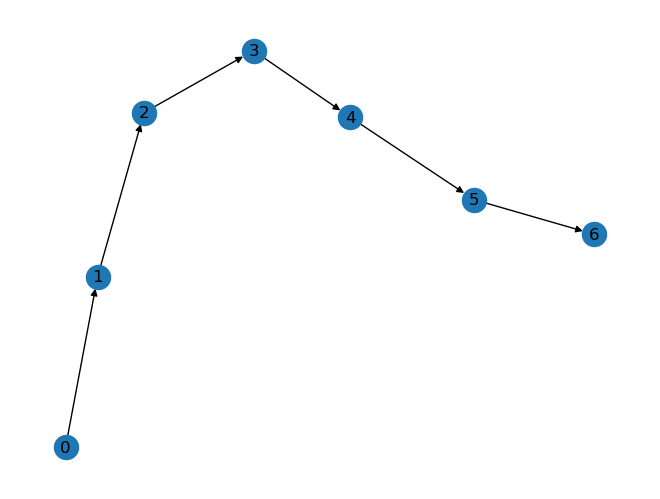

In [11]:
nx.draw(G, with_labels=True)

In [26]:
clear_db(con)
G = nx.path_graph(4)
db_of_graph(con, G)
res = con.execute(query_of_graph(G))
res.fetchall()
# undirected graph


[(1, 0, 1, 0),
 (1, 0, 1, 2),
 (0, 1, 0, 1),
 (0, 1, 2, 1),
 (0, 1, 2, 3),
 (2, 1, 0, 1),
 (2, 1, 2, 1),
 (2, 1, 2, 3),
 (1, 2, 1, 0),
 (1, 2, 1, 2),
 (1, 2, 3, 2),
 (3, 2, 1, 0),
 (3, 2, 1, 2),
 (3, 2, 3, 2),
 (2, 3, 2, 1),
 (2, 3, 2, 3)]

The two isomorphisms of the path graph

In [27]:
res = con.execute(query_of_graph(G,unique=True))
res.fetchall()

[(0, 1, 2, 3), (3, 2, 1, 0)]

Here we find a mapping into a color table considered as a complete graph
The lack of self edges in the color graph means no 

In [28]:
print(graph_of_db(con))
"DELETE FROM nodes WHERE nodes.v = ?"
"DELETE FROM edges where edges.src = ? OR edges.dst = ?"

clear_db(con)
colors = nx.complete_graph(2) # a two coloring
db_of_graph(con,colors)
# symmetrize. Maybe db_of_graph should do this. if not isinstanc(G,nx.DiGraph)
#con.execute("INSERT INTO edges SELECT edges.dst, edges.src FROM edges")
res = con.execute("SELECT * FROM edges")
res = print(res.fetchall())
res = con.execute(query_of_graph(G)) # two dimer colorings
print(res.fetchall())
# [(1, 0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 0, 1, 0)]


DiGraph with 4 nodes and 6 edges
[(0, 1), (1, 0)]
[(1, 0, 1, 0), (0, 1, 0, 1)]
